In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_excel('5 yrs wind generation.xlsx', 
                 parse_dates = ['Date'], index_col = 'Date')

In [42]:
df.head()

,Wind Generation(MU)
Date,
2017-01-01,41
2017-01-02,48
2017-01-03,45
2017-01-04,43
2017-01-05,29


In [43]:
# Checking shape of our data
df.shape
print("Our data contains", df.shape[0],"Rows and", df.shape[1], "Columns")

Our data contains 1912 Rows and 1 Columns


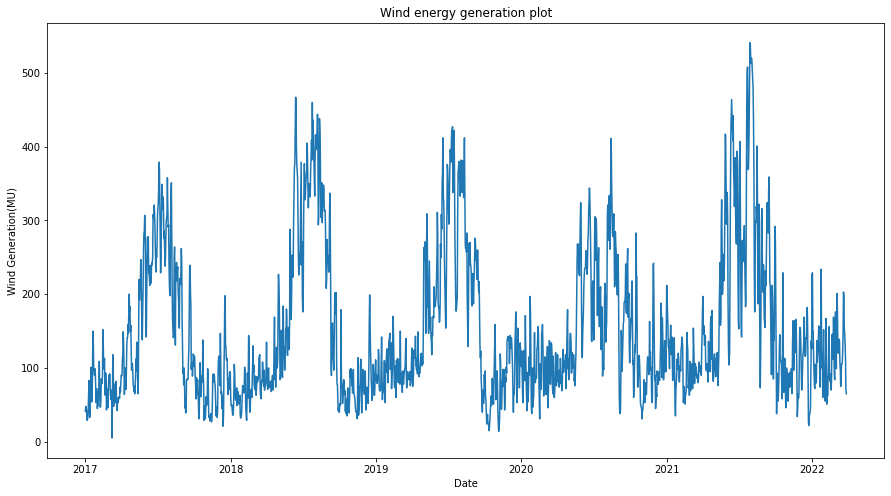

In [44]:
#plot graph
plt.figure(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('Wind Generation(MU)')
plt.title('Wind energy generation plot')
plt.plot(df)

In [45]:
#Determine rolling statistics
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()
print(rolmean, rolstd)

            Wind Generation(MU)
Date                           
2017-01-01                  NaN
2017-01-02                  NaN
2017-01-03                  NaN
2017-01-04                  NaN
2017-01-05                  NaN
...                         ...
2022-03-23           128.833333
2022-03-24           131.750000
2022-03-25           135.083333
2022-03-26           134.000000
2022-03-27           130.666667

[1912 rows x 1 columns]             Wind Generation(MU)
Date                           
2017-01-01                  NaN
2017-01-02                  NaN
2017-01-03                  NaN
2017-01-04                  NaN
2017-01-05                  NaN
...                         ...
2022-03-23            41.137979
2022-03-24            39.977551
2022-03-25            36.315432
2022-03-26            38.064538
2022-03-27            42.345620

[1912 rows x 1 columns]


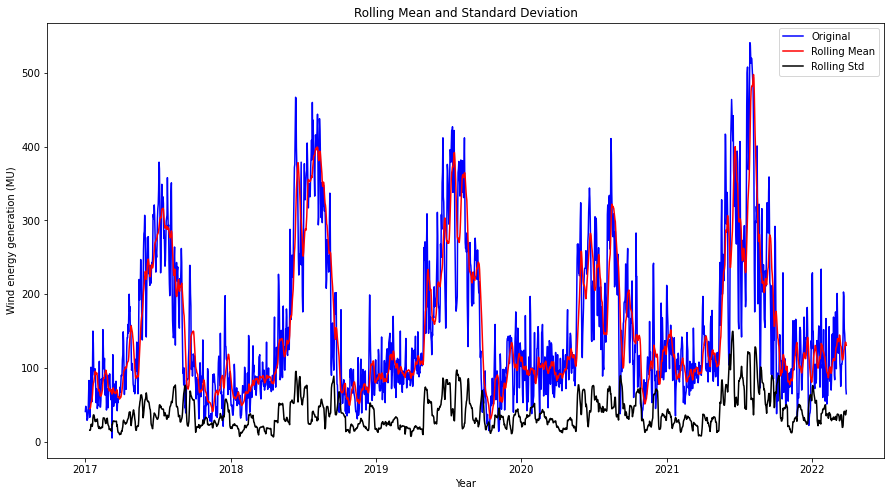

In [46]:
plt.figure(figsize=(15,8))
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.ylabel('Wind energy generation (MU)')
plt.xlabel('Year')
plt.show(block=False)

In [47]:
# Augemented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Augemented Dickey-Fuller Test")
dftest = esult=adfuller(df['Wind Generation(MU)'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value','Lags Used','Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Augemented Dickey-Fuller Test
Test Statistics                  -3.986846
p-value                           0.001481
Lags Used                        12.000000
Number of observations used    1899.000000
Critical Value (1%)              -3.433798
Critical Value (5%)              -2.863063
Critical Value (10%)             -2.567581
dtype: float64


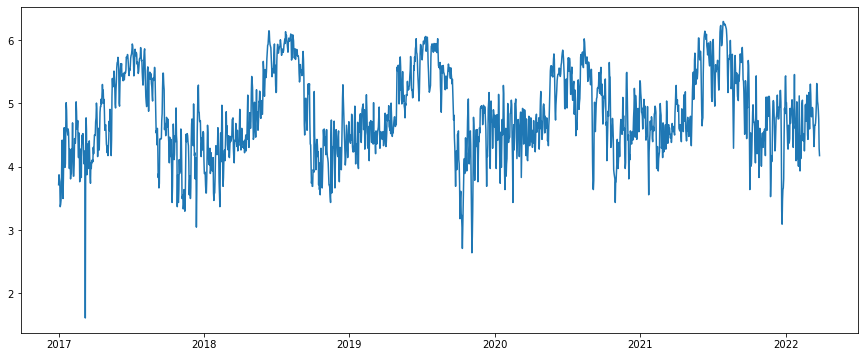

In [48]:
df_logScale = np.log(df)
plt.figure(figsize=(15,6))
plt.plot(df_logScale)

Text(0.5, 1.0, 'Rolling mean of wind energy after using log function')

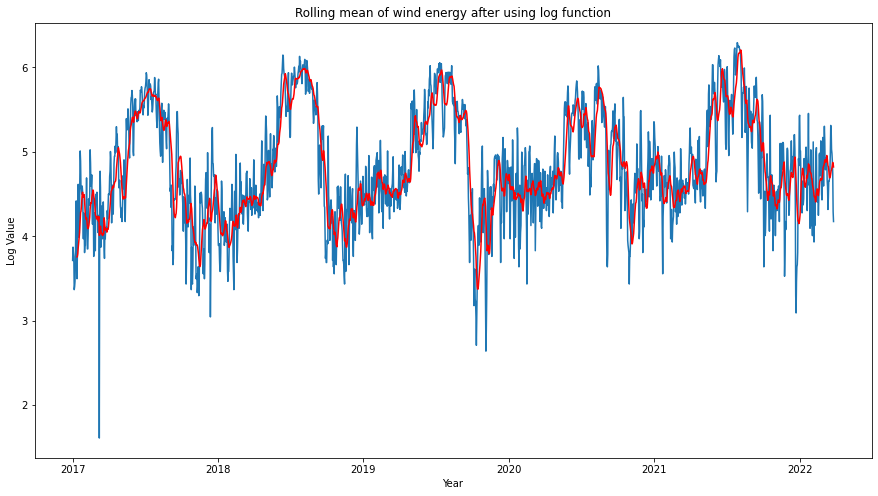

In [49]:
#This transformation will help to make series stationary
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD =df_logScale.rolling(window=12).std()
plt.figure(figsize=(15,8))
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')
plt.xlabel('Year')
plt.ylabel('Log Value')
plt.title('Rolling mean of wind energy after using log function')


In [50]:
resultseries = df_logScale - movingAverage
resultseries.head(12)

resultseries.dropna(inplace=True)
resultseries.head(10)

,Wind Generation(MU)
Date,
2017-01-12,-0.258997
2017-01-13,0.043401
2017-01-14,0.440602
2017-01-15,0.754245
2017-01-16,0.410255
2017-01-17,0.029944
2017-01-18,0.030523
2017-01-19,0.533642
2017-01-20,0.789740


In [51]:
def test_stationarity(timeseries):
    #Determining Rolling Statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting rolling statistics
    print(plt.figure(figsize=(15,8)))
    orig = plt.plot(timeseries, color='black',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(timeseries,color='yellow', label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation of Wind generation (MU)')
    plt.xlabel('Year')
    plt.ylabel('Values after differencing')
    plt.show(block=False)
    
    #Perform DIckey-Fuller Test
    print('Augemented Dickey-Fuller Test')
    dftest = adfuller(timeseries['Wind Generation(MU)'],autolag ='AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

Figure(1080x576)


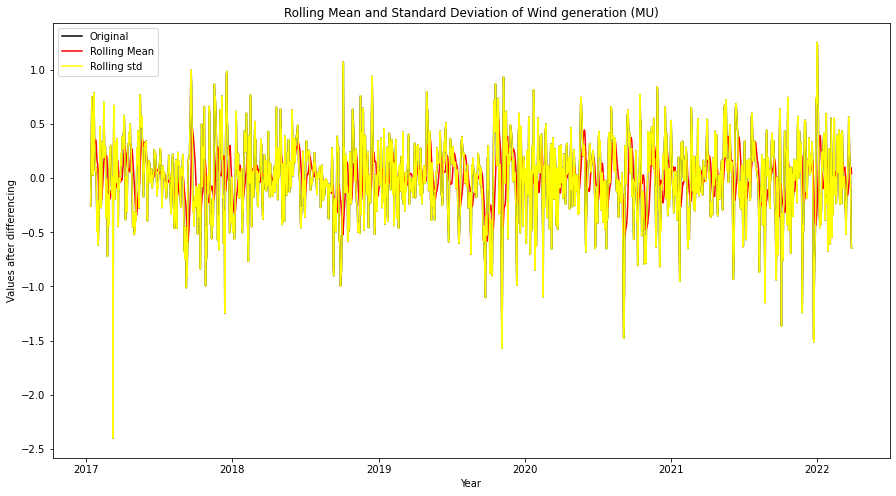

Augemented Dickey-Fuller Test
Test Statistic                -1.216437e+01
p-value                        1.468804e-22
Lags Used                      1.700000e+01
Number of Observations Used    1.883000e+03
Critical Value (1%)           -3.433828e+00
dtype: float64
Test Statistic                -1.216437e+01
p-value                        1.468804e-22
Lags Used                      1.700000e+01
Number of Observations Used    1.883000e+03
Critical Value (1%)           -3.433828e+00
Critical Value (5%)           -2.863076e+00
dtype: float64
Test Statistic                -1.216437e+01
p-value                        1.468804e-22
Lags Used                      1.700000e+01
Number of Observations Used    1.883000e+03
Critical Value (1%)           -3.433828e+00
Critical Value (5%)           -2.863076e+00
Critical Value (10%)          -2.567588e+00
dtype: float64


In [52]:
test_stationarity(resultseries)

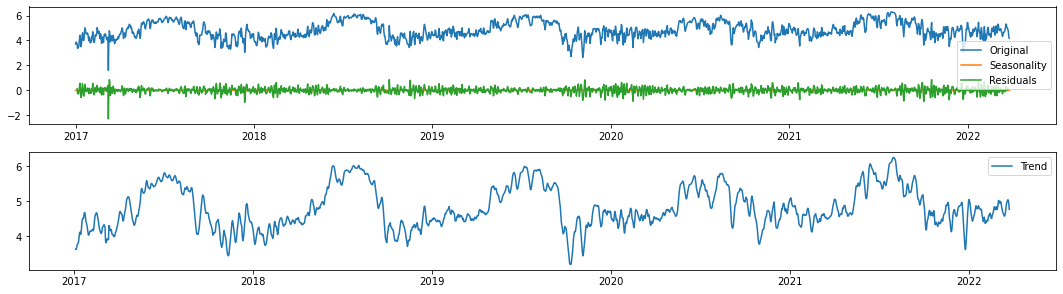

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(df_logScale, label='Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


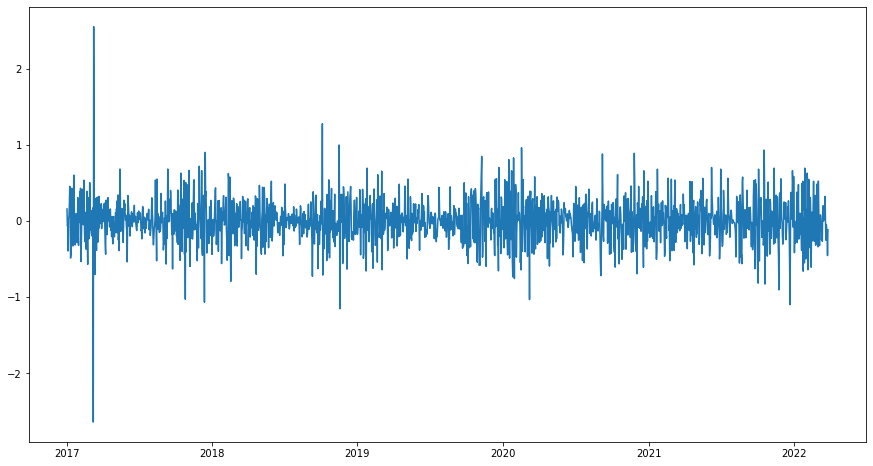

In [54]:
datasetLogDiffShifting = df_logScale - df_logScale.shift()
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)

Figure(1080x576)


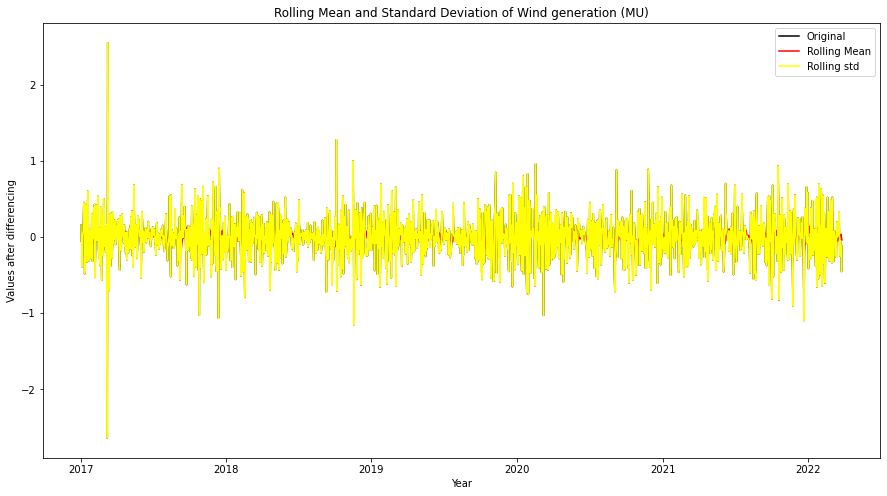

Augemented Dickey-Fuller Test
Test Statistic                -1.552901e+01
p-value                        2.232967e-28
Lags Used                      1.500000e+01
Number of Observations Used    1.895000e+03
Critical Value (1%)           -3.433806e+00
dtype: float64
Test Statistic                -1.552901e+01
p-value                        2.232967e-28
Lags Used                      1.500000e+01
Number of Observations Used    1.895000e+03
Critical Value (1%)           -3.433806e+00
Critical Value (5%)           -2.863066e+00
dtype: float64
Test Statistic                -1.552901e+01
p-value                        2.232967e-28
Lags Used                      1.500000e+01
Number of Observations Used    1.895000e+03
Critical Value (1%)           -3.433806e+00
Critical Value (5%)           -2.863066e+00
Critical Value (10%)          -2.567583e+00
dtype: float64


In [55]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [56]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0, 0.5, 'Autocorrelation value')

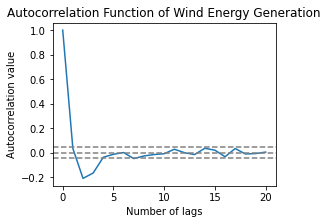

In [57]:
plt.figure(figsize=(4,3))
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function of Wind Energy Generation')
plt.xlabel('Number of lags')
plt.ylabel('Autocorrelation value')

Text(0, 0.5, 'Partial Autocorrelation value')

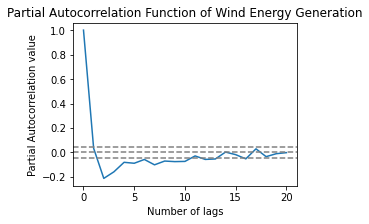

In [58]:
plt.figure(figsize=(4,3))
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function of Wind Energy Generation')
plt.xlabel('Number of lags')
plt.ylabel('Partial Autocorrelation value')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

Plotting AR Model


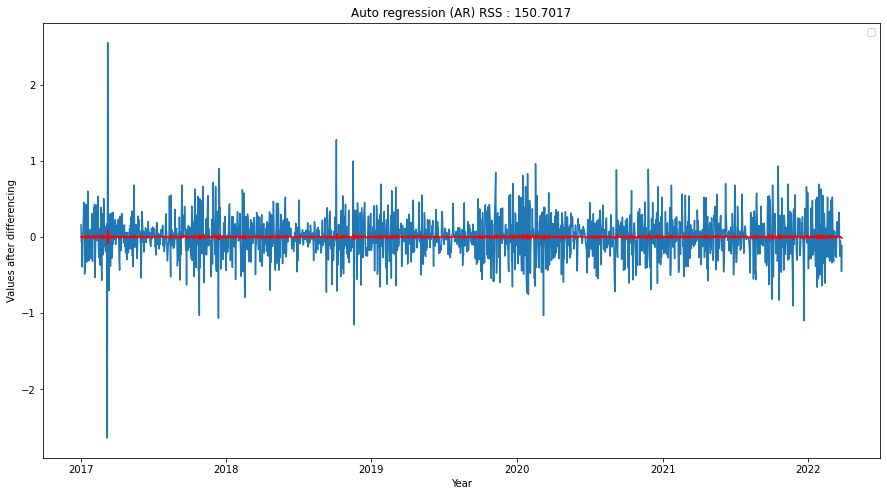

In [59]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(df_logScale, order=(1,1,0))
results_AR = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('Auto regression (AR) RSS : %.4f'%sum((results_AR.fittedvalues -datasetLogDiffShifting['Wind Generation(MU)'])**2))
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Values after differencing')
print('Plotting AR Model')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Plotting AR Model


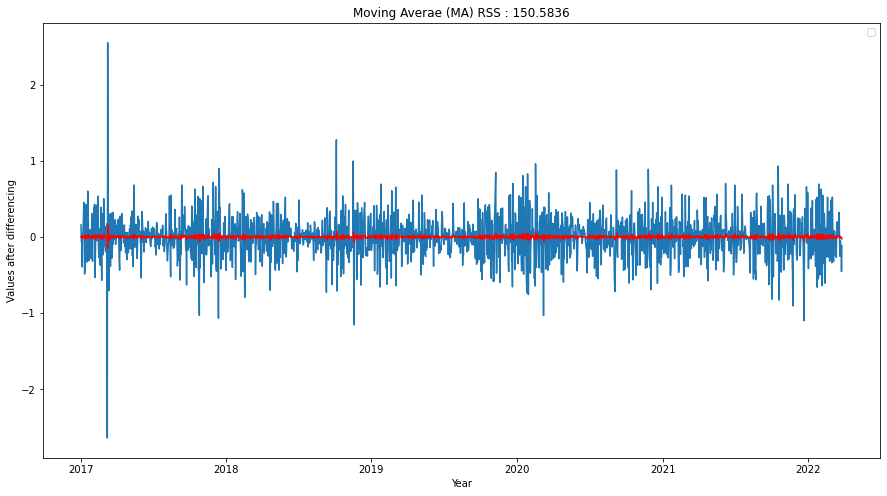

In [60]:
#MA Model
model = ARIMA(df_logScale, order=(0,1,1))
results_MA = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Moving Averae (MA) RSS : %.4f'%sum((results_MA.fittedvalues -datasetLogDiffShifting['Wind Generation(MU)'])**2))
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Values after differencing')
print('Plotting AR Model')

C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\wazid\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnin

Plotting AR Model


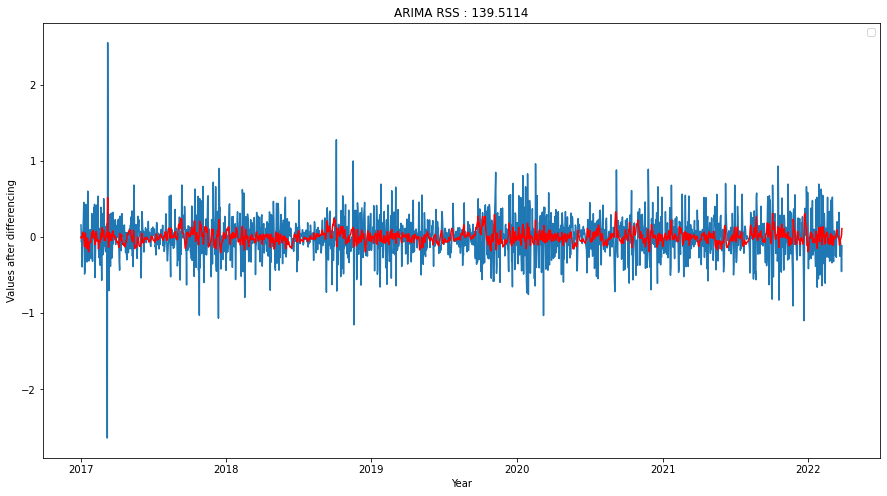

In [61]:
model = ARIMA(df_logScale, order=(1,1,1))
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15,8))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA RSS : %.4f'%sum((results_ARIMA.fittedvalues -datasetLogDiffShifting['Wind Generation(MU)'])**2))
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Values after differencing')
print('Plotting AR Model')

In [62]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2017-01-02    0.000377
2017-01-03   -0.019226
2017-01-04   -0.007716
2017-01-05    0.000058
2017-01-06    0.061872
dtype: float64


In [63]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2017-01-02    0.000377
2017-01-03   -0.018849
2017-01-04   -0.026565
2017-01-05   -0.026506
2017-01-06    0.035366
                ...   
2022-03-23   -0.224015
2022-03-24   -0.250397
2022-03-25   -0.256591
2022-03-26   -0.233915
2022-03-27   -0.124291
Length: 1911, dtype: float64


In [64]:
predictions_ARIMA_log = pd.Series(df_logScale['Wind Generation(MU)'].iloc[0], index=df_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2017-01-01    3.713572
2017-01-02    3.713949
2017-01-03    3.694723
2017-01-04    3.687007
2017-01-05    3.687066
dtype: float64

In [65]:
np.array(predictions_ARIMA_log)

array([3.71357207, 3.71394949, 3.69472347, ..., 3.45698104, 3.4796574 ,
       3.58928131])

Text(0, 0.5, 'log value')

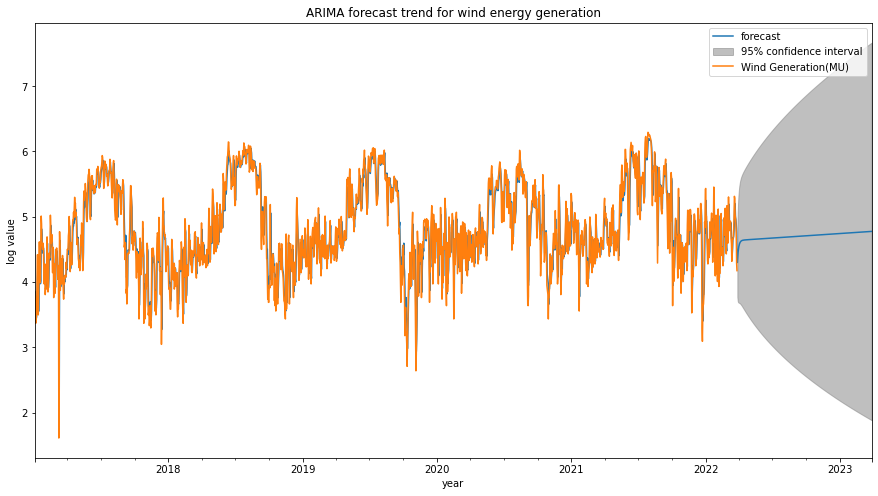

In [66]:
fig, ax = plt.subplots(figsize=(15, 8))
fig = results_ARIMA.plot_predict(1,2277,ax=ax) 
plt.title('ARIMA forecast trend for wind energy generation')
plt.xlabel('year')
plt.ylabel('log value')

In [67]:
y_pred=np.array(results_ARIMA.predict(1,1911)).reshape(-1,1)
y_test = np.array(datasetLogDiffShifting).reshape(-1,1)

In [68]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt

In [69]:
print(f"Mean Absolute Error            : {round(mean_absolute_error(y_pred,y_test),2)}")
print(f"Mean Squared Error             : {round(mean_squared_error(y_pred,y_test),2)}")
print(f"Root Mean Squared Error        : {round(sqrt(mean_squared_error(y_pred,y_test)),2)}")
print(f"Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_pred,y_test),2)}")

Mean Absolute Error            : 0.2
Mean Squared Error             : 0.07
Root Mean Squared Error        : 0.27
Mean Absolute Percentage Error : 21.42


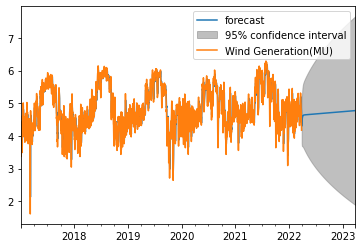

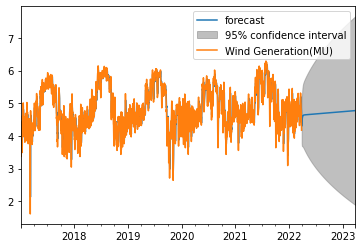

In [70]:
results_ARIMA.plot_predict(1,2277) 
 

In [71]:
np.array(datasetLogDiffShifting).reshape(-1,1)

array([[ 0.15762894],
       [-0.06453852],
       [-0.04546237],
       ...,
       [-0.145417  ],
       [-0.45447269],
       [-0.11607217]])

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
mean_absolute_error(np.array(results_ARIMA.predict(1,1911)).reshape(-1,1),np.array(datasetLogDiffShifting).reshape(-1,1))

0.19780117923285936

In [74]:
x=results_ARIMA.forecast(steps=365)

In [75]:
forecast = np.exp(np.array(pd.DataFrame(x).iloc[0,:]).reshape(-1,1).astype(float))
forecast

array([[ 73.60512687],
       [ 80.62899994],
       [ 86.20276678],
       [ 90.53638905],
       [ 93.85687391],
       [ 96.37513182],
       [ 98.27188781],
       [ 99.69455557],
       [100.75957559],
       [101.5569405 ],
       [102.15515695],
       [102.60582065],
       [102.94749543],
       [103.20884697],
       [103.41109904],
       [103.56992031],
       [103.69685419],
       [103.80039195],
       [103.88677281],
       [103.96057746],
       [104.02516698],
       [104.08300647],
       [104.13590333],
       [104.18518243],
       [104.23181476],
       [104.27651187],
       [104.31979515],
       [104.36204661],
       [104.40354615],
       [104.44449881],
       [104.48505483],
       [104.52532426],
       [104.56538774],
       [104.60530432],
       [104.64511728],
       [104.68485833],
       [104.72455069],
       [104.76421137],
       [104.80385285],
       [104.84348424],
       [104.88311226],
       [104.9227418 ],
       [104.96237646],
       [105

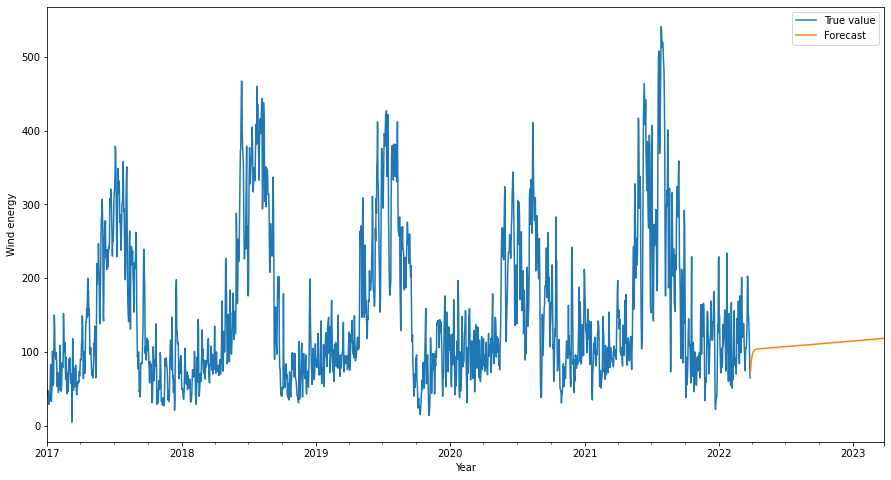

In [76]:
from datetime import datetime, timedelta
last_date = df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=365,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df = df.append(df1)
df['Wind Generation(MU)'].plot(figsize=(15,8), label = 'True value')
df['Forecast'].plot(label='Forecast')
plt.xlabel('Year')
plt.ylabel('Wind energy')
plt.legend()

In [77]:
df1

,Forecast
2022-03-28,73.605127
2022-03-29,80.629000
2022-03-30,86.202767
2022-03-31,90.536389
2022-04-01,93.856874
...,...
2023-03-23,118.347247
2023-03-24,118.391922
2023-03-25,118.436615
2023-03-26,118.481324


In [78]:
df1.describe()

,Forecast
count,365.000000
mean,110.418695
std,5.459079
min,73.605127
25%,106.921656
50%,110.657721
75%,114.524332
max,118.526050
